## Introduction

This document produces a short, minimalist worked-example of an Analysis Notebook documenting the process from data entry to production of publication-quality figures.

## Hypothesis and design
A good analysis follows any *a priori* hypotheses and follows from an appropriate experimental design. In this case, Darwin's hypothesis was that self-pollination leads to inbreeding depression. Accordingly, the design compares the fitness (using plant height as a surrogate) of pairs of self- and cross-pollinated plants. 

Adding SMPracticals darwin dataset from file

In [1]:
import pandas as pd
df = pd.read_csv("SMPractical_darwindataset.csv")


## Exploratory graphics

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(df["type"],df["height"])
plt.margins(1)
plt.grid()
plt.xlabel("type",fontsize=12)
plt.ylabel("height",fontsize=12)
plt.show()

<Figure size 640x480 with 1 Axes>

## Analysis
Linear model analysis:

In [3]:
from statsmodels.formula.api import ols
linmodel = ols(formula="height ~ type", data=df)
result = linmodel.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 height   R-squared:                       0.175
Model:                            OLS   Adj. R-squared:                  0.146
Method:                 Least Squares   F-statistic:                     5.940
Date:                Thu, 23 May 2019   Prob (F-statistic):             0.0214
Time:                        12:27:51   Log-Likelihood:                -73.889
No. Observations:                  30   AIC:                             151.8
Df Residuals:                      28   BIC:                             154.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       20.1917      0.759     26.596   

Analysis of variance

In [4]:
from statsmodels.stats import anova
table = anova.anova_lm(result)
print(table)

            df      sum_sq    mean_sq         F    PR(>F)
type       1.0   51.352083  51.352083  5.939518  0.021414
Residual  28.0  242.083333   8.645833       NaN       NaN


## Assumptions
Diagnostic plot of residuals vs. fitted values:


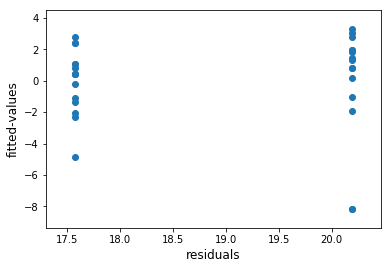

In [5]:
import matplotlib.pyplot as plt
from statsmodels.api import graphics
plt.scatter(result.fittedvalues,result.resid)
plt.margins(0.1)
plt.xlabel("residuals",fontsize=12)
plt.ylabel("fitted-values",fontsize=12)
plt.show()

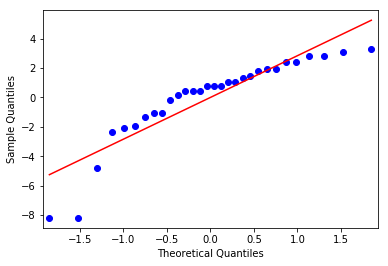

In [6]:
import matplotlib.pyplot as plt
from statsmodels.api import graphics
fig = graphics.qqplot(result.resid,line="s")
plt.show()

## Figures for publication

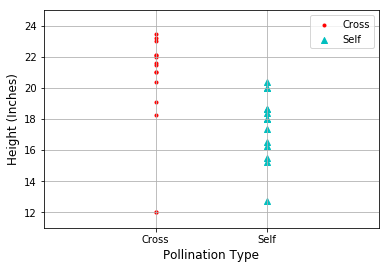

In [7]:
import matplotlib.pyplot as plt
plt.scatter(df["type"][df["type"]=="Cross"],df["height"][df["type"]=="Cross"],marker=".",color="r",label="Cross")
plt.scatter(df["type"][df["type"]=="Self"],df["height"][df["type"]=="Self"],marker="^",color="c",label="Self")
plt.margins(1)
plt.grid()
plt.ylim(11,25)
plt.xlabel("Pollination Type",fontsize=12)
plt.ylabel("Height (Inches)",fontsize=12)
plt.legend()
plt.show()

## Summary
The mean heights of the cross- and self-pollinated plants were 20.2 (95% CI: 18.6, 21.7) and 17.6 (16.0, 19.1) inches respectively, with a difference in height of -2.6 inches. A 95% CI for the difference in height did not contain zero.
## Software versions:

In [12]:
print("pandas: "+str(pd.__version__))
import matplotlib
print("matplotlib: "+str(matplotlib.__version__))
import numpy as np
print("numpy: "+str(np.__version__))
import statsmodels
print("statsmodels: "+str(statsmodels.__version__))

pandas: 0.24.2
matplotlib: 2.2.4
numpy: 1.16.3
statsmodels: 0.9.0
